# MNIST Digits Classification using Neural Networks



Mount your drive in order to run locally with colab

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


download & load the MNIST dataset.

*just run the next two cells and observe the outputs (shift&enter)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done
the training data set contains 60000 samples
each sample image from the training data set is a column-stacked grayscale image of 784 pixels
 this vectorized arrangement of the data is suitable for a Fully-Connected NN (as apposed to a Convolutional NN)
these column-stacked images can be reshaped to an image of (28, 28) pixels


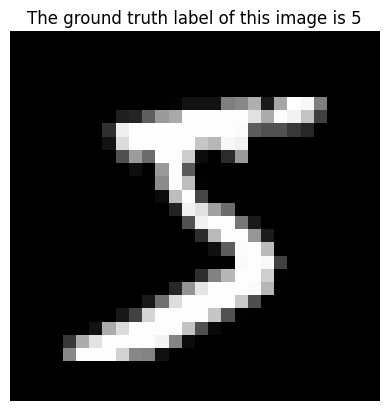

In [8]:

#importing modules that will be in use
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import gzip
import pickle
from PIL import Image
import random
import numpy as np

def _download(file_name):
    file_path = os.path.join(dataset_dir,file_name)

    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_name)
    print("Done")

def download_mnist():
    for v in key_file.values():
       _download(v)

def _load_label(file_name):
    file_path =  os.path.join(dataset_dir, file_name)

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")

    return labels

def _load_img(file_name):
    file_path = os.path.join(dataset_dir,file_name)

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")

    return data

def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])

    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1

    return T

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """
    Parameters
    ----------
    normalize : Normalize the pixel values
    flatten : Flatten the images as one array
    one_hot_label : Encode the labels as a one-hot array

    Returns
    -------
    (Trainig Image, Training Label), (Test Image, Test Label)
    """
    if not os.path.exists(save_file):
        init_mnist()

    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])


# Load the MNIST dataset
url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = '/content'
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True)


# printing data shape

print('the training data set contains '+ str(x_train.shape[0]) + ' samples')

img = x_train[0]
label = t_train[0]

img = img.reshape(28, 28)
print('each sample image from the training data set is a column-stacked grayscale image of '+ str(x_train.shape[1]) +' pixels'
      + '\n this vectorized arrangement of the data is suitable for a Fully-Connected NN (as apposed to a Convolutional NN)' )
print('these column-stacked images can be reshaped to an image of ' +str(img.shape)+ ' pixels')

# printing a sample from the dataset

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('The ground truth label of this image is '+str(label))
plt.show()

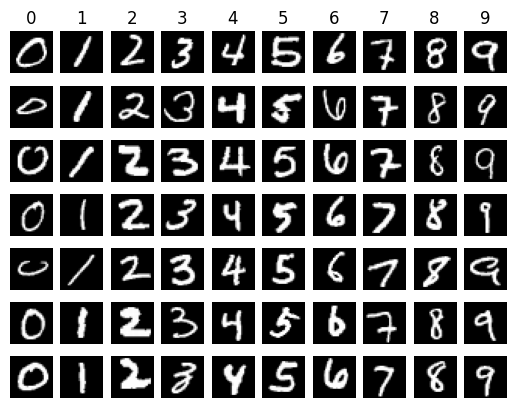

In [9]:
# Visualize some examples from the dataset.
# We'll show a few examples of training images from each class.
num_classes = 10
samples_per_class = 7
for cls in range(num_classes):
    idxs = np.argwhere(t_train==cls)
    sample = np.random.choice(idxs.shape[0], samples_per_class, replace=False) # randomly picks 7 from the appearences
    idxs=idxs[sample]

    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + cls + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        img = x_train[idx].reshape(28, 28)

        plt.imshow(img, cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

**QUESTION 1**:What are vanishing gradients? Name one known activation function that has this problem and one that does not.

**ANSWER**:
Vanishing gradients is a phenomena where the gradients of the networks become very small. Thus, when we update the weights of our network while using very small gradients, the update will also be small and as a result our network will be stuck at the same state.
An example of a function which has this problem is the sigmoid function. For small values of x, the derivative is finite. However, when the absolute value of x becomes a little too big, the gradient of this function becomes effectively zero.
An example of a function which does not have this problem is the relu.







here we will implement the sigmoid activation function and it's gradient

In [10]:

def sigmoid(x):
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################
    sig = 1 / (1 + np.exp(-x))
    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################
    return sig
def sigmoid_grad(x):
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################
    sig_grad = sigmoid(x) * (1 - sigmoid(x))
    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################
    return sig_grad


Implement a fully-vectorized loss function for the Softmax classifier
Make sure the softmax is stable.
To make our softmax function numerically stable,we simply normalize the values in the vector,
by multiplying the numerator and denominator with a constant C.
We can choose an arbitrary value for log(C) term, but generally log(C)=−max(a) is chosen, as it shifts all of elements in the vector to negative to zero, and negatives with large exponents saturate to zero rather than the infinity.

In [45]:
def softmax(x):
    """
  Softmax loss function, should be implemented in a vectorized fashion (without loops)


  Inputs:
  - X: A numpy array of shape (N, C) containing a minibatch of data.
  Returns:
  - probabilities: A numpy array of shape (N, C) containing the softmax probabilities.

  if you are not careful here, it is easy to run into numeric instability
     """
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################
    N, C = x.shape
    x = x * np.max(x, axis=1, keepdims=True)
    probabilities = np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)
    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################
    return probabilities

def cross_entropy_error(y, t):
    """
    Inputs:

    - t:  A numpy array of shape (N,C) containing  a minibatch of training labels, it is a one-hot array,
      with t[GT]=1 and t=0 elsewhere, where GT is the ground truth label ;
    - y: A numpy array of shape (N, C) containing the softmax probabilities (the NN's output).

    Returns a tuple of:
    - loss as single float (do not forget to divide by the number of samples in the minibatch (N))
    """
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################
    # Compute loss
    error = -np.sum(t * np.log(y), axis=1)
    error = np.mean(error, axis=0)
    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################
    return error

We will design and train a two-layer fully-connected neural network with sigmoid nonlinearity and
softmax cross entropy loss. We assume an input dimension of D=784, a hidden dimension of H, and perform classification over C classes.

The architecture should be fullyconnected -> sigmoid -> fullyconnected -> softmax.

The learnable parameters of the model are stored in the dictionary,
'params', that maps parameter names to numpy arrays.

In the next cell we will initialize the weights and biases, design the fully connected(fc) forward and backward functions that will be in use for the training (using SGD).



In [12]:
def TwoLayerNet( input_size, hidden_size, output_size, weight_init_std=0.01):
    ############################################################################
    # TODO: Initialize the weights and biases of the two-layer net. Weights    #
    # should be initialized from a Gaussian with standard deviation equal to   #
    # weight_init_std, and biases should be initialized to zero. All weights and  #
    # biases should be stored in the dictionary 'params', with first layer  #
    # weights and biases using the keys 'W1' and 'b1' and second layer weights #
    # and biases using the keys 'W2' and 'b2'.                                 #
    ############################################################################
    w1 = np.random.normal(loc=0.0, scale=weight_init_std, size=(input_size, hidden_size))
    b1 = np.zeros(hidden_size)
    w2 = np.random.normal(loc=0.0, scale=weight_init_std, size=(hidden_size, output_size))
    b2 = np.zeros(output_size)
    params = {
        "W1": w1,
        "b1": b1,
        "W2": w2,
        "b2": b2
    }
    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################
    return params


def FC_forward(x, w, b):
    """
    Computes the forward pass for a fully-connected layer.
    The input x has shape (N, D) and contains a minibatch of N
    examples, where each example x[i] has shape D and will be transformed to an output vector of dimension M.
    Inputs:
    - x: A numpy array containing input data, of shape (N, D)
    - w: A numpy array of weights, of shape (D, M)
    - b: A numpy array of biases, of shape (M,)

    Returns a tuple of:
    - out: output result of the forward pass, of shape (N, M)
    - cache: (x, w, b)
    """
    out = None
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################
    N, D = x.shape
    out = np.matmul(x, w) + np.tile(b, (N, 1))
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    cache = (x, w, b)
    return out, cache



def FC_backward(dout, cache):
    """
    Computes the backward pass for a fully-connected layer.
    Inputs:
    - dout: Upstream derivative, of shape (N, M)
    - cache: Tuple of:
    - x: A numpy array containing input data, of shape (N, D)
    - w: A numpy array of weights, of shape (D, M)
    - b: A numpy array of biases, of shape (M,)
    Returns a tuple of:
    - dx: Gradient with respect to x, of shape (N, D)
    - dw: Gradient with respect to w, of shape (D, M)
    - db: Gradient with respect to b, of shape (M,)
    """
    x, w, b = cache
    dx, dw, db = None, None, None
    N, M = dout.shape
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################
    dx = np.matmul(dout, w.T)
    dw = np.matmul(x.T, dout)
    db = np.matmul((1 / N) * np.ones(N), dout)
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    return dx, dw, db



Here we will design the entire model, which outputs the NN's probabilities and gradients.


In [49]:
def Model(params, x, t):
    """
    Computes the backward pass for a fully-connected layer.
    Inputs:
    - params:  dictionary with first layer weights and biases using the keys 'W1' and 'b1' and second layer weights
    and biases using the keys 'W2' and 'b2'. each with dimensions corresponding its input and output dimensions.
    - x: Input data, of shape (N,D)
    - t:  A numpy array of shape (N,C) containing training labels, it is a one-hot array,
      with t[GT]=1 and t=0 elsewhere, where GT is the ground truth label ;
    Returns:
    - y: the output probabilities for the minibatch (at the end of the forward pass) of shape (N,C)
    - grads: dictionary containing gradients of the loss with respect to W1, W2, b1, b2.

    note: use the FC_forward ,FC_backward functions.

    """
    W1, W2 = params['W1'], params['W2']
    b1, b2 = params['b1'], params['b2']
    grads = {'W1': None ,'W2': None, 'b1': None ,'b2': None }

    batch_num = x.shape[0]

    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################
    # forward (fullyconnected -> sigmoid -> fullyconnected -> softmax).
    out1, cache1 = FC_forward(x, W1, b1)
    out2, cache2 = FC_forward(sigmoid(out1), W2, b2)
    y = softmax(out2)

    # backward - calculate gradients.
    loss = cross_entropy_error(y, t)
    dout = np.copy(y)
    for i in range(len(t)):
      label_index = np.argmax(t[i, :])
      dout[i, label_index] -= 1
    dx2, dw2, db2 = FC_backward(dout, cache2)
    dout = dx2 * sigmoid_grad(out1)
    dx1, dw1, db1 = FC_backward(dout, cache1)
    grads = {
        "dW1": dw1,
        "db1": db1,
        "dW2": dw2,
        "db2": db2
    }
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################

    return grads, y

Compute the accuracy of the NNs predictions.


In [52]:


def accuracy(y,t):
    """
    Computes the accuracy of the NN's predictions.
    Inputs:
    - t:  A numpy array of shape (N,C) containing training labels, it is a one-hot array,
      with t[GT]=1 and t=0 elsewhere, where GT is the ground truth label ;
    - y: the output probabilities for the minibatch (at the end of the forward pass) of shape (N,C)
    Returns:
    - accuracy: a single float of the average accuracy.
    """
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################
    N, C = t.shape
    decision = np.argmax(y, axis=1)
    accuracy = decision == np.argmax(t, axis=1)
    accuracy = np.sum(accuracy) / N
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    return accuracy * 100



Trianing the model:
To train our network we will use minibatch SGD.  
*Note that the test dataset is actually used as the validation dataset in the training

training of 60 epochs, each epoch will have 117 iterations
train acc: 39.70% |  test acc: 74.77000000000001% |  loss for epoch 0: 2.931716301242244
train acc: 82.18% |  test acc: 87.94% |  loss for epoch 1: 0.5686492386912764
train acc: 88.03% |  test acc: 90.0% |  loss for epoch 2: 0.40632100375827523
train acc: 89.60% |  test acc: 90.48% |  loss for epoch 3: 0.35830056375683866
train acc: 90.46% |  test acc: 90.82000000000001% |  loss for epoch 4: 0.3404172578296582
train acc: 90.98% |  test acc: 91.53999999999999% |  loss for epoch 5: 0.31639964420346056
train acc: 91.19% |  test acc: 91.99000000000001% |  loss for epoch 6: 0.308958054034579
train acc: 91.54% |  test acc: 91.88% |  loss for epoch 7: 0.29566130459700213
train acc: 91.64% |  test acc: 92.22% |  loss for epoch 8: 0.29762044041899977
train acc: 91.81% |  test acc: 92.58% |  loss for epoch 9: 0.28568819335091816
train acc: 92.37% |  test acc: 92.41% |  loss for epoch 10: 0.2729919001765287
train acc: 92.56% |  test acc: 

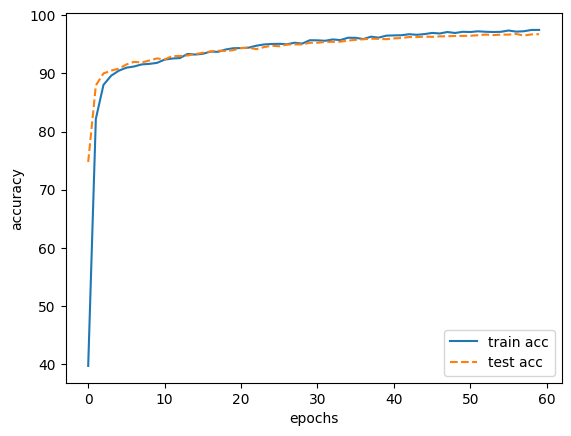

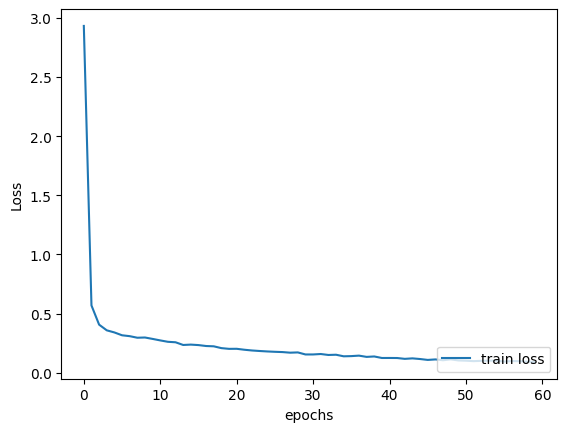

In [55]:


# You should be able to receive at least 97% accuracy, choose hyperparameters accordingly.

epochs = 60
mini_batch_size = 512
learning_rate = 0.001
num_hidden_cells = 256

def Train(epochs_num, batch_size, lr, H):
    #  Dividing a dataset into training data and test data

    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
    C=10
    D=x_train.shape[1]
    network_params = TwoLayerNet(input_size=D, hidden_size=H, output_size=C) #hidden_size is the only hyperparameter here

    train_size = x_train.shape[0]
    train_loss_list = []
    train_acc_list = []
    test_acc_list = []
    iter_per_epoch = round(train_size / batch_size)
    print('training of ' + str(epochs_num) +' epochs, each epoch will have '+ str(iter_per_epoch)+ ' iterations')
    for i in range(epochs_num):

        train_loss_iter= []
        train_acc_iter= []

        for k in range(iter_per_epoch):


            #############################################################################
            #                             YOUR CODE                                     #
            #############################################################################
            # 1. Select part of training data (mini-batch) randomly
            number_of_batches = round(train_size / batch_size)
            random_batch = np.random.randint(number_of_batches)
            x_batch = x_train[random_batch * batch_size:(random_batch + 1) * batch_size, :]
            t_batch = t_train[random_batch * batch_size:(random_batch + 1) * batch_size, :]
            # 2. Calculate the predictions and the gradients to reduce the value of the loss function
            grads, y_batch = Model(network_params, x_batch, t_batch)

            # 3. Update weights and biases with the gradients
            # print(grads["dW1"].shape)
            # print(network_params["W1"].shape)
            network_params["W1"] -= lr * grads["dW1"]
            network_params["b1"] -= lr * grads["db1"]
            network_params["W2"] -= lr * grads["dW2"]
            network_params["b2"] -= lr * grads["db2"]

            #############################################################################
            #                             END OF YOUR CODE                              #
            #############################################################################

            # Calculate the loss and accuracy for visalizaton
            error=cross_entropy_error(y_batch, t_batch)
            train_loss_iter.append(error)
            acc_iter=accuracy(y_batch, t_batch)
            train_acc_iter.append(acc_iter)
            if k == iter_per_epoch-1:
                train_acc = np.mean(train_acc_iter)
                train_acc_list.append(train_acc)
                train_loss_list.append(np.mean(train_loss_iter))

                _, y_test = Model(network_params, x_test, t_test)
                test_acc = accuracy(y_test, t_test)
                test_acc_list.append(test_acc)
                print("train acc: " + str(train_acc)[:5] + "% |  test acc: "   + str(test_acc) + "% |  loss for epoch " + str(i) +": "+ str(np.mean(train_loss_iter)))
    return train_acc_list, test_acc_list, train_loss_list, network_params

train_acc, test_acc, train_loss, net_params = Train(epochs, mini_batch_size, learning_rate, num_hidden_cells)

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc))
plt.plot(x, train_acc, label='train acc')
plt.plot(x, test_acc, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(loc='lower right')
plt.show()


markers = {'train': 'o'}
x = np.arange(len(train_loss))
plt.plot(x, train_loss, label='train loss')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(loc='lower right')
plt.show()


# You should be able to receive at least 97% accuracy, choose hyperparameters accordingly.


**QUESTION 2:** Explain the results looking at the visualizations above, base your answer on the hyperparameters.

**ANSWER:**
As we can see from the graphs above, at the beginning, the accuracy is very low because of the fact that the network is intialized with random variables.
As the training process progresses we can see that the accuracy becomes better.
Because of the small value of the learning rate we use, the rate of the accuracy is very high at the beginning of the training process and becomes smaller and smaller. If we used a high value for the learning rate, we would see that the network will not be able to converge and the accuracy value will oscilate.




**QUESTION** 3: Suggest a way to improve the results by changing the networks's architecture  

**ANSWER**:
In order to improve the results we could use a relu activation function instead of the sigmoid between the 2 fully connected layers. This would improve the network results as it will overcome the vanishing gradient problem which was described at the beginning.



(784, 256)


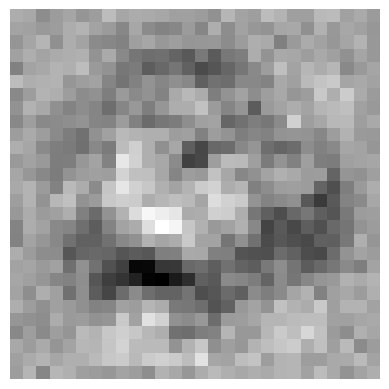

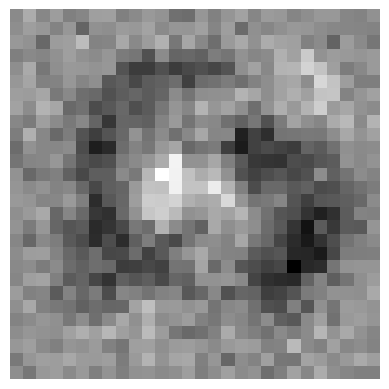

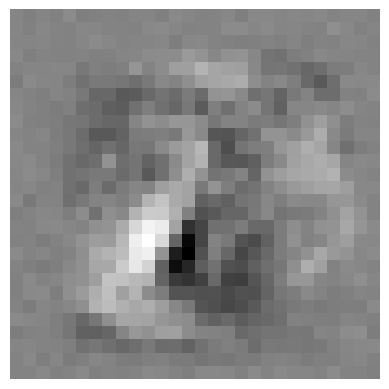

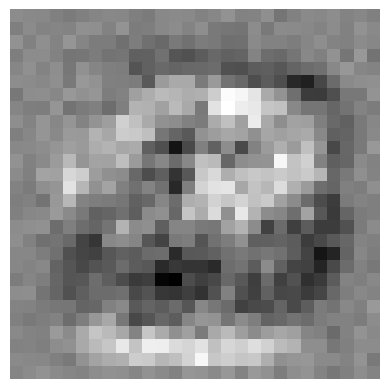

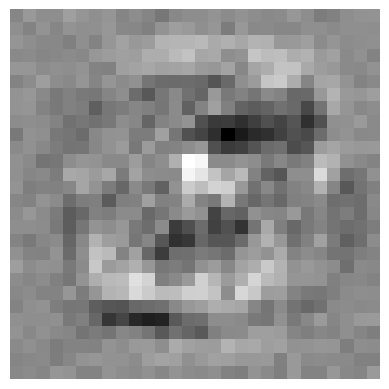

In [56]:
# Visualize some weights. features of digits should be somehow present.
def show_net_weights(params):
    W1 = params['W1']
    print(W1.shape)
    for i in range(5):
        W = W1[:,i*5].reshape(28, 28)
        plt.imshow(W,cmap='gray')
        plt.axis('off')
        plt.show()

show_net_weights(net_params)


Implement, train and test the same two-layer network, using a **deep learning library** (pytorch/tensorflow/keras).

As before, you should be able to receive at least 97% accuracy.

Please note, that in this section you will need to implement the model, the training and the testing by yourself (you may use the code in earlier sections)
Don't forget to print the accuracy during training (in the same format as before).

For installing a deep learning library, you should use "!pip3 install..." (lookup the compatible syntex for your library)

Building model...
MNISTmodel(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)
Loaded Data Successfully
Start Running Model
--------------------------------------------------
| Epoch 1 | Loss 1.98 | Accuracy 50.76 %|
| Epoch 1 | Loss 1.64 | Accuracy 63.50 %|
| Epoch 1 | Loss 1.38 | Accuracy 69.95 %|
| Epoch 1 | Loss 1.20 | Accuracy 73.83 %|
| Epoch 1 | Loss 1.07 | Accuracy 76.59 %|

| End Of Epoch 1 |
| Train Loss 0.51 | Train Accuracy 86.91% |
| Test Loss 0.49 | Test Accuracy 87.50% |
--------------------------------------------------
| Epoch 2 | Loss 0.45 | Accuracy 88.53 %|
| Epoch 2 | Loss 0.43 | Accuracy 89.19 %|
| Epoch 2 | Loss 0.41 | Accuracy 89.27 %|
| Epoch 2 | Loss 0.40 | Accuracy 89.60 %|
| Epoch 2 | Loss 0.38 | Accuracy 89.82 %|

| End Of Epoch 2 |
| Train Loss 0.36 | Train Accuracy 89.26% |
| Test Loss 0.29 | Test Accuracy 93.16% |
--------------------------------------------------
| Epoch 3 | Los

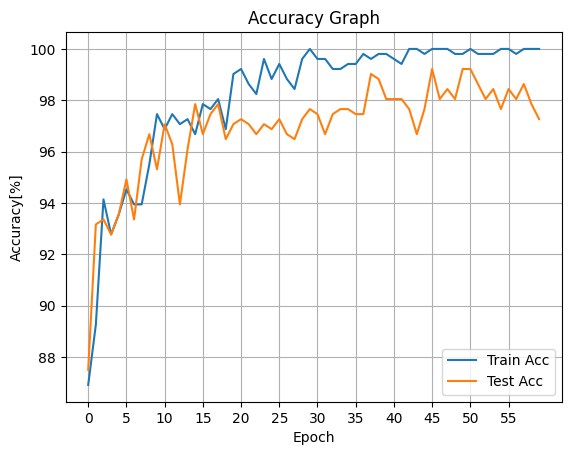

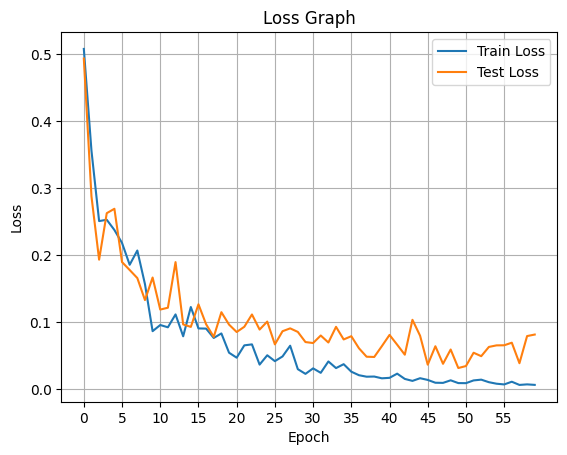

In [79]:
 #############################################################################
 #                             YOUR CODE                                     #
 #############################################################################
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

class MNISTmodel(nn.Module):
  def __init__(self, input_size, hidden_layers, output_classes):
    super().__init__()
    self.input_size = input_size
    self.hidden_layers = hidden_layers
    self.output_classes = output_classes
    self.fc1 = nn.Linear(input_size, hidden_layers)
    self.fc2 = nn.Linear(hidden_layers, output_classes)

  def forward(self, x):
    out = self.fc1(x)
    out = F.sigmoid(out)
    out = self.fc2(out)
    return out


class Handler:
  def __init__(self, input_size, hidden_size, output_classes, criterion, lr,
               epochs, batch_size):
    self.epochs = epochs
    self.batch_size = batch_size
    self.criterion = criterion

    print("Building model...")
    self.model = MNISTmodel(input_size, hidden_size, output_classes)
    print(self.model)

    self.optimizer = optim.AdamW(self.model.parameters(), lr=lr)
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
    x_train = torch.from_numpy(x_train)
    t_train = torch.from_numpy(t_train)
    x_test = torch.from_numpy(x_test)
    t_test = torch.from_numpy(t_test)
    self.train_dataset = TensorDataset(x_train, t_train)
    self.test_dataset = TensorDataset(x_test, t_test)
    print("Loaded Data Successfully")

  def train_one_epoch(self, epoch):
    self.model.train()

    correct_labels = 0
    total_labels = 0
    accuracy = 0
    total_loss = 0
    average_loss = 0
    train_dataloader = DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True)

    print_every = len(train_dataloader) // 5
    for batch_idx, (image, label) in enumerate(train_dataloader):
      if batch_idx % print_every == 0 and batch_idx != 0:
        print(f"| Epoch {epoch + 1} | Loss {average_loss:.2f} | Accuracy {accuracy:.2f} %|")

      self.optimizer.zero_grad()

      result = self.model(image)

      loss = self.criterion(result, label)

      loss.backward()
      self.optimizer.step()

      total_loss += loss.item()
      average_loss = total_loss / (batch_idx + 1)
      decision = torch.argmax(result, dim=-1)
      total_labels += decision.shape[0]
      correct_labels += torch.sum(decision == torch.argmax(label, dim=-1)).item()
      accuracy = 100 * (correct_labels / total_labels)

    return accuracy, average_loss

  def evaluate_model_on_dataset(self, dataset):
    self.model.eval()

    correct_labels = 0
    total_labels = 0
    total_loss = 0
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    for batch_idx, (image, label) in enumerate(dataloader):
      with torch.no_grad():
        result = self.model(image)

        loss = self.criterion(result, label)

        total_loss += loss.item()
        decision = torch.argmax(result, dim=-1)
        total_labels += decision.shape[0]
        correct_labels += torch.sum(decision == torch.argmax(label, dim=-1)).item()
        average_loss = total_loss / (batch_idx + 1)

      return 100 * (correct_labels / total_labels), average_loss

  def plot_data(self, train_accuracy_lst, train_loss_lst, test_accuracy_lst, test_loss_lst):
    plt.plot(train_accuracy_lst, label="Train Acc")
    plt.plot(test_accuracy_lst, label="Test Acc")
    plt.title("Accuracy Graph")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy[%]")
    plt.legend(loc="lower right")
    plt.xticks(np.arange(0, len(train_accuracy_lst), 5))
    plt.grid()
    plt.show()

    plt.plot(train_loss_lst, label="Train Loss")
    plt.plot(test_loss_lst, label="Test Loss")
    plt.title("Loss Graph")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc="upper right")
    plt.xticks(np.arange(0, len(train_loss_lst), 5))
    plt.grid()
    plt.show()

  def run(self):
    print(f"Start Running Model")

    best_accuracy = 0

    train_accuracy_lst = []
    train_loss_lst = []
    test_accuracy_lst = []
    test_loss_lst = []

    for epoch in range(self.epochs):
      print("-" * 50)
      self.train_one_epoch(epoch)

      train_accuracy, train_loss = self.evaluate_model_on_dataset(self.train_dataset)
      test_accuracy, test_loss = self.evaluate_model_on_dataset(self.test_dataset)

      train_accuracy_lst.append(train_accuracy)
      train_loss_lst.append(train_loss)
      test_accuracy_lst.append(test_accuracy)
      test_loss_lst.append(test_loss)

      print(f"\n| End Of Epoch {epoch + 1} |")
      print(f"| Train Loss {train_loss:.2f} | Train Accuracy {train_accuracy:.2f}% |")
      print(f"| Test Loss {test_loss:.2f} | Test Accuracy {test_accuracy:.2f}% |")
    print("-" * 50)
    self.plot_data(train_accuracy_lst, train_loss_lst, test_accuracy_lst, test_loss_lst)


input_size = 28 * 28
hidden_size = 256
output_classes = 10
criterion = nn.CrossEntropyLoss()
lr = 0.001
epochs = 60
batch_size = 512

handler = Handler(input_size=input_size,
                  hidden_size=hidden_size,
                  output_classes=output_classes,
                  criterion=criterion,
                  lr=lr,
                  epochs=epochs,
                  batch_size=batch_size)

handler.run()